In [1]:
# Dataset: https://archive.ics.uci.edu/ml/datasets/Adult
# Goal is to predict whether a person makes over 50K a year.

In [2]:
# This kind of prediction can be used by banks for targeted marketing.

In [3]:
# load libraries
import pandas as pd
import numpy as np

In [4]:
# load the data

df = pd.read_csv("./sample_data/adult.csv")

In [5]:
# EDA

In [6]:
# step 1: sneak peak data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# step 2: identify datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# step 3: describe columns
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# identify if there are null values in data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
# list of all columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [11]:
# list of features and target column name
features = [
    'age', 'workclass', 'fnlwgt', 'education', 'education.num',
    'marital.status', 'occupation', 'relationship', 'race', 'sex',
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
]

target = ['income']

In [12]:
# value counts for target 
df[target].value_counts()

income
<=50K     24720
>50K       7841
dtype: int64

In [13]:
# identify categorical and numerical columns

numerical_features = [ 'age',  'fnlwgt',  'education.num', 'capital.gain', 'capital.loss',  'hours.per.week']
categorical_features = ['workclass',  'education', 'marital.status', 'occupation', 'relationship',  'race', 'sex','native.country', 'income']

In [14]:
# processing of categorical features - using label encoding
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(labelEncoder.fit_transform)
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [15]:
# confirm value counts on target variable
df[target].value_counts()

income
0         24720
1          7841
dtype: int64

In [16]:
# scaling numerical features - using min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,0,0.043987,11,0.533333,6,0,1,4,0,0.0,1.000000,0.397959,39,0
1,0.890411,4,0.081896,11,0.533333,6,4,1,4,0,0.0,1.000000,0.173469,39,0
2,0.671233,0,0.118021,15,0.600000,6,0,4,2,0,0.0,1.000000,0.397959,39,0
3,0.506849,4,0.086982,5,0.200000,0,7,4,4,0,0.0,0.895317,0.397959,39,0
4,0.328767,4,0.171404,15,0.600000,5,10,3,4,0,0.0,0.895317,0.397959,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,4,0.202298,15,0.600000,4,11,1,4,1,0.0,0.000000,0.397959,39,0
32557,0.136986,4,0.166404,7,0.733333,2,13,5,4,0,0.0,0.000000,0.377551,39,0
32558,0.315068,4,0.096500,11,0.533333,2,7,0,4,1,0.0,0.000000,0.397959,39,1
32559,0.561644,4,0.094827,11,0.533333,6,1,4,4,0,0.0,0.000000,0.397959,39,0


In [17]:
# identify input columns and target column
X = df[features]
y = df[target]

In [18]:
# split the data in training and testing data
from sklearn.model_selection import train_test_split

X_trainAndVal, X_test, y_trainAndVal, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_trainAndVal, y_trainAndVal, test_size = 0.33, random_state = 0)

y_trainAndVal = y_trainAndVal.values.ravel()
y_train = y_train.values.ravel()



print(df.shape)
print(type(X))
print(type(y))
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(32561, 15)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(16361, 14)
(16361,)
(8059, 14)
(8059, 1)
(8141, 14)
(8141, 1)


In [19]:
# machine learning - different models - with defaults
# since it is a classification problem, we will try to use Decision Tree, RandomForest and LogisticRegression Algorithms

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [21]:
# decision tree
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_trainAndVal, y_trainAndVal)
y_pred = decisionTree.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

accuracy score: 0.8082545141874462


In [39]:
from numpy.random.mtrand import random
# random forest tree

randomForest = RandomForestClassifier()
print(randomForest)
randomForest.fit(X_trainAndVal, y_trainAndVal)
y_pred = randomForest.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

RandomForestClassifier()
accuracy score: 0.8548089915243827


In [23]:
# logistic regression

logisticsRegression = LogisticRegression()
logisticsRegression.fit(X_trainAndVal, y_trainAndVal)
y_pred = logisticsRegression.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))


accuracy score: 0.8057978135364205


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# svc
svc = SVC()
svc.fit(X_trainAndVal, y_trainAndVal)
y_pred = svc.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))


accuracy score: 0.7607173565900995


In [45]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_trainAndVal, y_trainAndVal)
y_pred = knn.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

accuracy score: 0.8242230684191131


In [24]:
# based on the above experiment with default hyperparameters, random forest seems like the best model with  85.46 % accuracy

In [25]:
# we will now try to tune hyperparameters with cross validation and apply best model retrived to X_test

In [26]:
# decision trees

def getBestDecisionTreeModel():
  dt = DecisionTreeClassifier()
  params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
  }
  grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
  grid_search.fit(X_trainAndVal,y_trainAndVal)
  return grid_search.best_estimator_

bestDecisionTree = getBestDecisionTreeModel()
print(bestDecisionTree)
bestDecisionTree.fit(X_trainAndVal, y_trainAndVal)
y_pred = bestDecisionTree.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 140 candidates, totalling 560 fits
DecisionTreeClassifier(max_depth=14, min_samples_leaf=50)
accuracy score: 0.8514924456454981


In [46]:
# random forest

def getBestRandomForestModel():
  # Create the parameter grid based on the results of random search 
  param_grid = {
    'bootstrap': [True],
    'min_samples_split': [10, 20],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [300, 400, 500]
  }
  # Create a based model
  rf = RandomForestClassifier()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)
  # Fit the grid search to the data
  grid_search.fit(X_trainAndVal,y_trainAndVal)
  return grid_search.best_estimator_

bestRandomForest = getBestRandomForestModel()
print(bestRandomForest)
bestRandomForest.fit(X_trainAndVal, y_trainAndVal)
y_pred = bestRandomForest.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=300)
accuracy score: 0.8615649183147034


In [48]:
# svc 

def getBestSVCModel():
  svc = SVC()
  param_grid = [    
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
  ]
  clf = GridSearchCV(svc, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
  best_clf = clf.fit(X_trainAndVal,y_trainAndVal)
  return best_clf.best_estimator_

bestSVC = getBestSVCModel()
print(bestSVC)
bestSVC.fit(X_trainAndVal, y_trainAndVal)
y_pred = bestSVC.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVC(kernel='linear')
accuracy score: 0.8196781722147156


In [51]:
#knn 

def getBestKNNModel():
  knn = KNeighborsClassifier()
  param_grid = [    
    {
        'n_neighbors': [15, 20, 25],
        'weights' : ['uniform', 'distance']
    }
  ]
  clf = GridSearchCV(knn, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
  best_clf = clf.fit(X_trainAndVal,y_trainAndVal)
  return best_clf.best_estimator_

bestKNN = getBestKNNModel()
print(bestKNN)
bestKNN.fit(X_trainAndVal, y_trainAndVal)
y_pred = bestKNN.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
KNeighborsClassifier(n_neighbors=25, weights='distance')
accuracy score: 0.8281537894607542


In [55]:
# logistic regression

def getBestLogisticRegressionModel():
  logModel = LogisticRegression()
  param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [500]
    }
  ]
  clf = GridSearchCV(logModel, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
  best_clf = clf.fit(X_trainAndVal,y_trainAndVal)
  return best_clf.best_estimator_

bestLRM = getBestLogisticRegressionModel()
print(bestLRM)
bestLRM.fit(X_trainAndVal, y_trainAndVal)
y_pred = bestLRM.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, y_pred)))

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1438.44988828766, max_iter=500)
accuracy score: 0.8205380174425746


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# After hyperparameter tuning, Random forest seems to be performing best with 86.15% accuracy score.
# we can also look at other stats for this model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


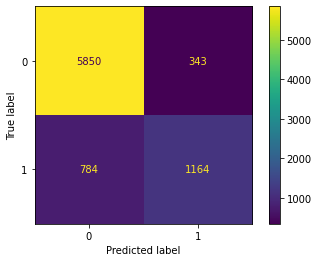

In [57]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(bestRandomForest, X_test, y_test)  

In [59]:
from sklearn.metrics import classification_report
y_pred = bestRandomForest.predict(X_test)
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6193
        >50K       0.77      0.60      0.67      1948

    accuracy                           0.86      8141
   macro avg       0.83      0.77      0.79      8141
weighted avg       0.86      0.86      0.86      8141



In [60]:
# we can also provide the visualization of random forest model with best results for easy interpretation by end users
# the code below only provide visualization of 1 tree in the random forest

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=20, random_state=701931479)


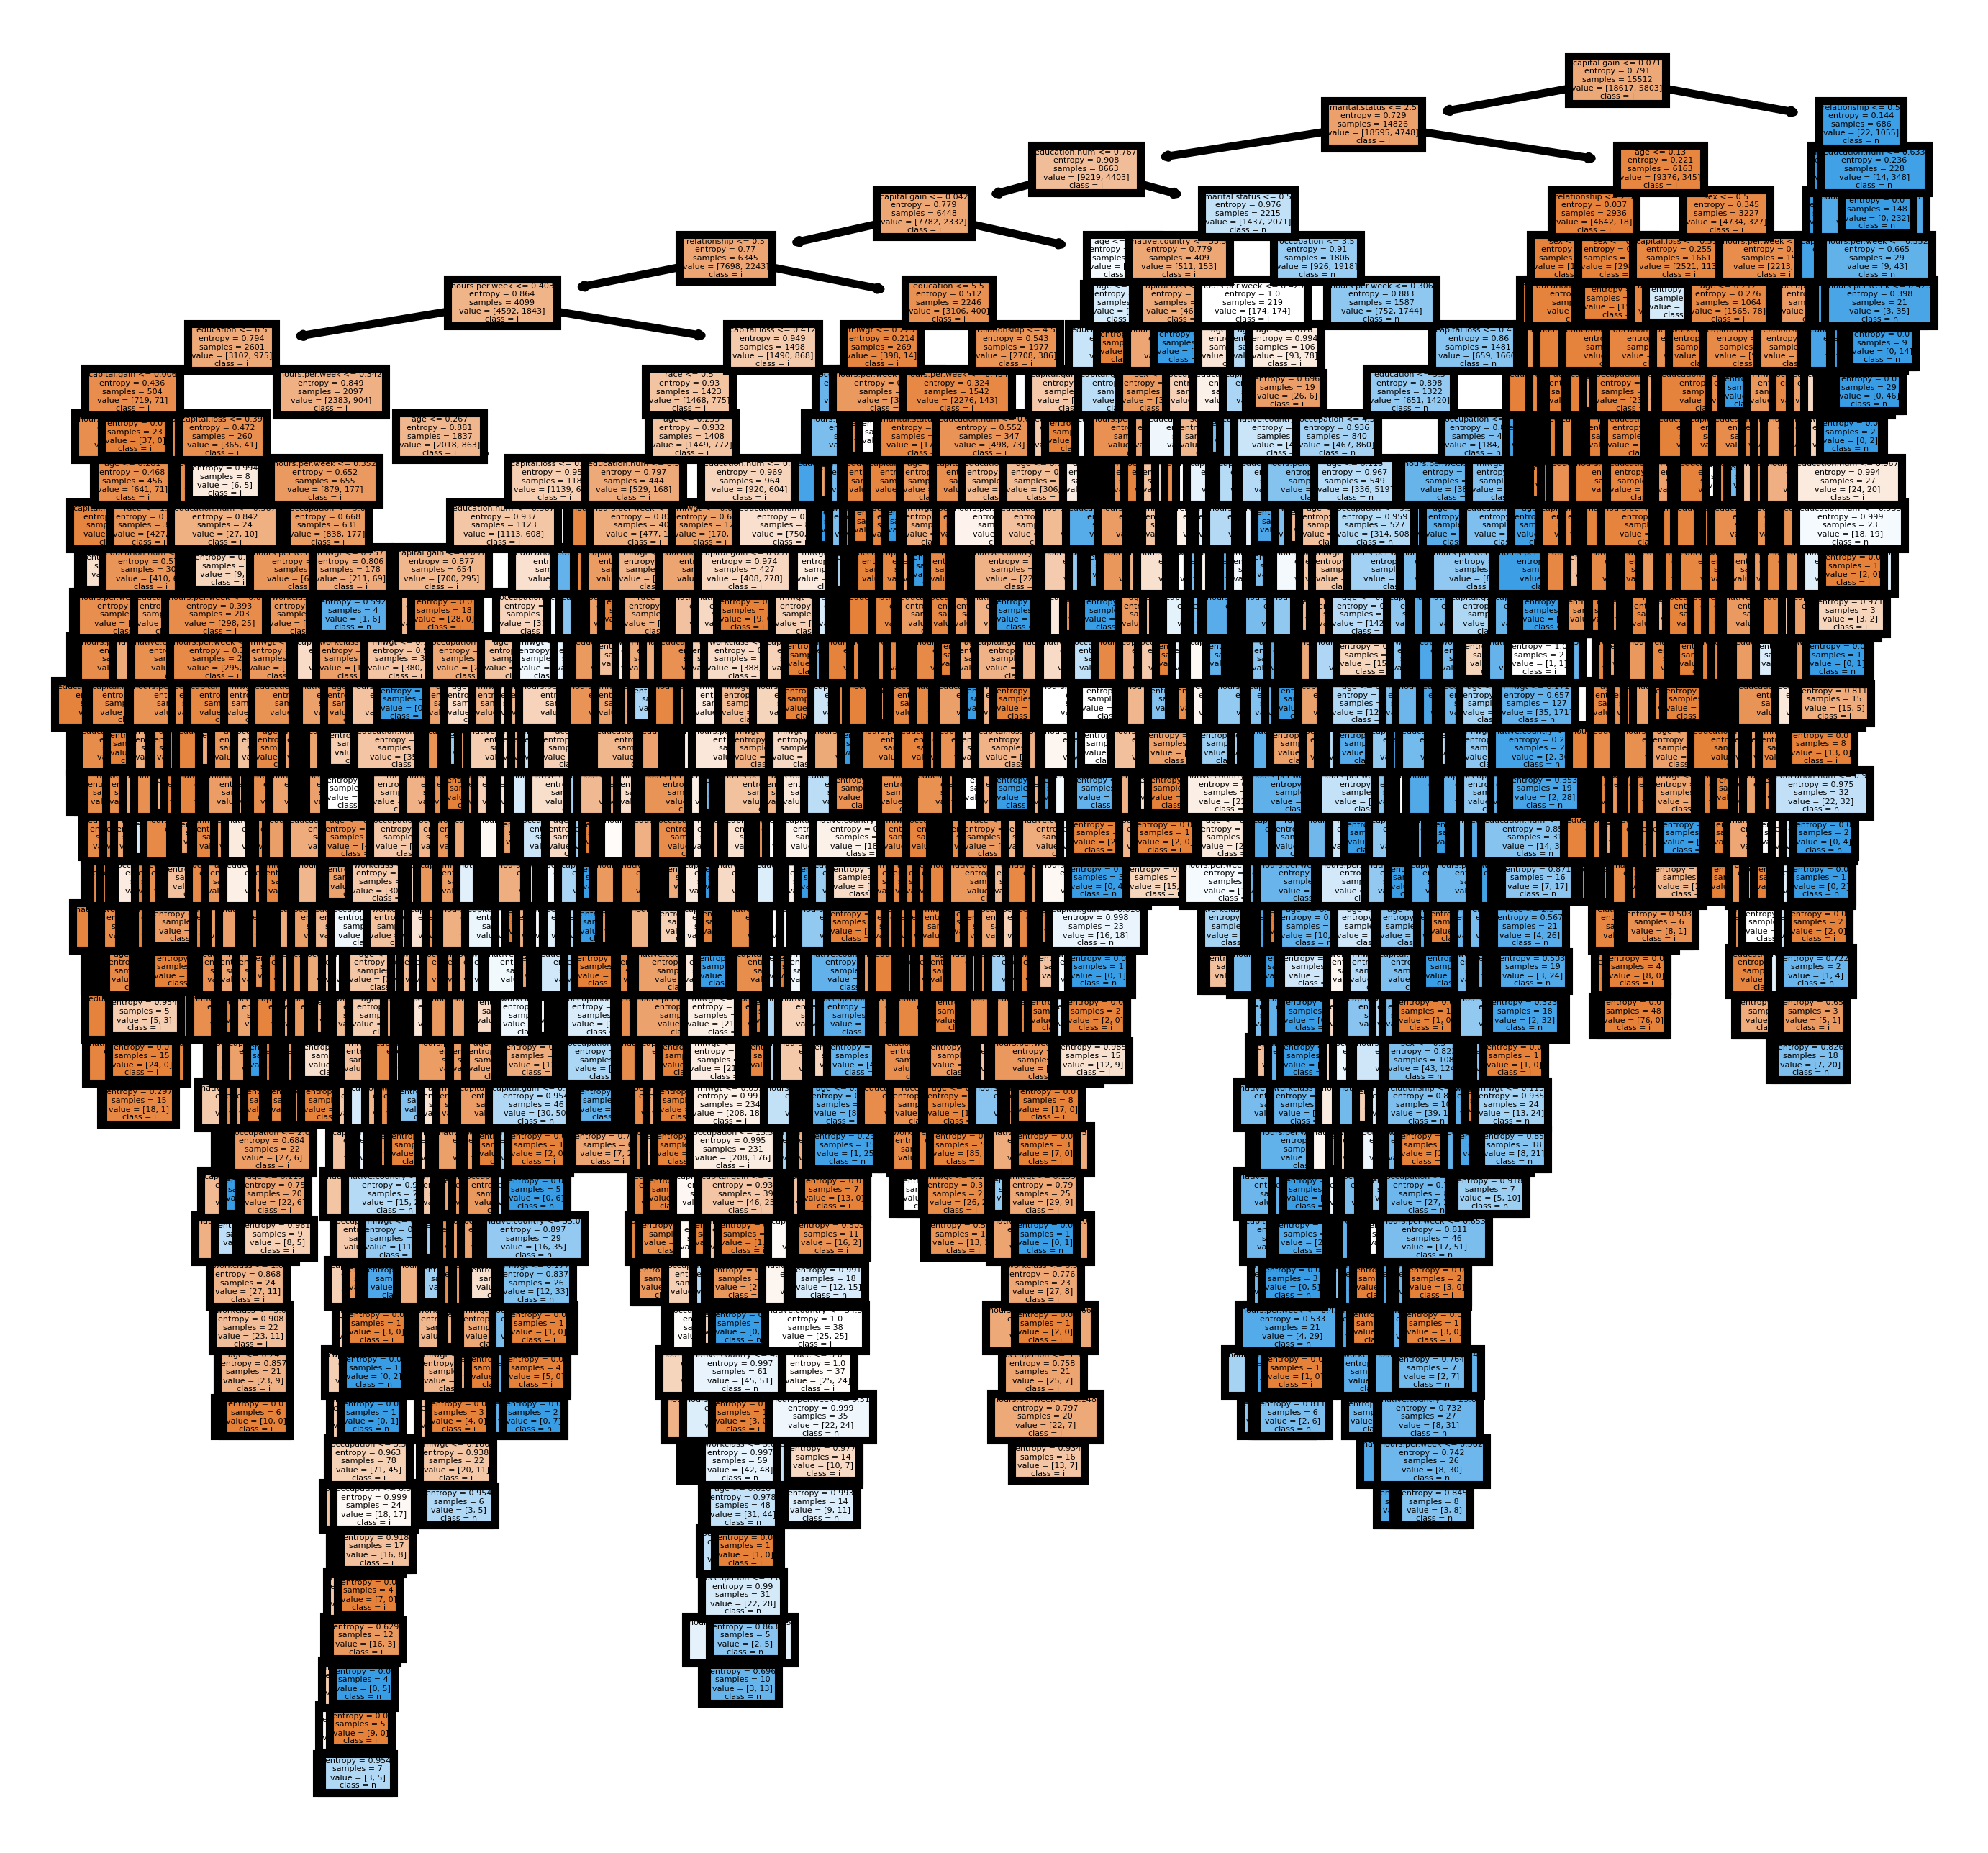

In [67]:
import matplotlib.pyplot as plt
from sklearn import tree

# Extract single tree
estimator = bestRandomForest.estimators_[0]

print(estimator)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator, feature_names = features,  class_names='income', filled = True);
fig.savefig('rf_individualtree.png')
